In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load Dataset
file_path = "AirbnbData.xlsx"
df = pd.read_excel(file_path)

In [10]:
df.columns = [c.strip().lower() for c in df.columns]


In [11]:
num_cols = ['price','service fee','review rate number','availability 365',
            'construction year','calculated host listings count','number of reviews']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

In [25]:
# Q1. Which cancellation policy is most popular?

policy_count = df['cancellation_policy'].value_counts().head(3)
print("5️⃣ Most Common Cancellation Policies:")
print(policy_count)
print()



5️⃣ Most Common Cancellation Policies:
cancellation_policy
moderate    34343
strict      34106
flexible    34074
Name: count, dtype: int64



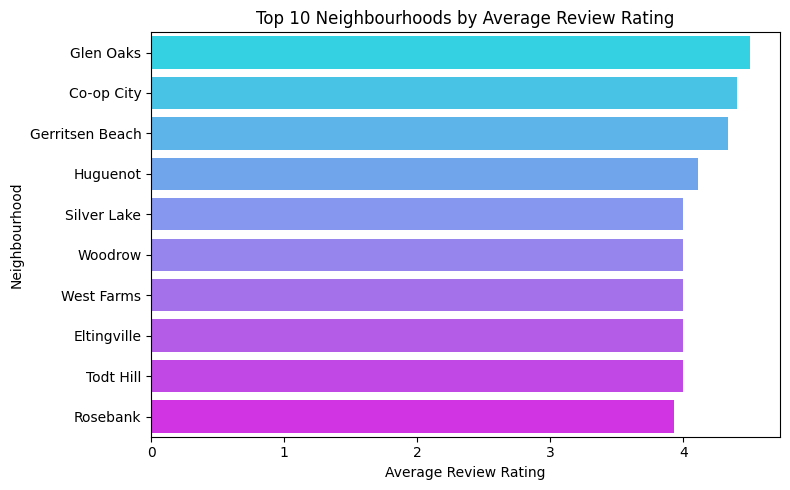

Insight: High-rated neighbourhoods may indicate cleaner, safer or better managed areas.


In [13]:
# Q2. Which neighbourhoods have the highest average review ratings?

top_review_neigh = df.groupby('neighbourhood')['review rate number'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_review_neigh.values, y=top_review_neigh.index, palette='cool')
plt.title('Top 10 Neighbourhoods by Average Review Rating')
plt.xlabel('Average Review Rating')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

print("Insight: High-rated neighbourhoods may indicate cleaner, safer or better managed areas.")

In [24]:
# Q3. Correlation between Price, Service Fee, and Review Rating

corr = df[['price','service fee','review rate number']].corr()
print("4️⃣ Correlation Matrix:")
print(corr)
print()

4️⃣ Correlation Matrix:
                       price  service fee  review rate number
price               1.000000     0.999991           -0.004576
service fee         0.999991     1.000000           -0.004389
review rate number -0.004576    -0.004389            1.000000



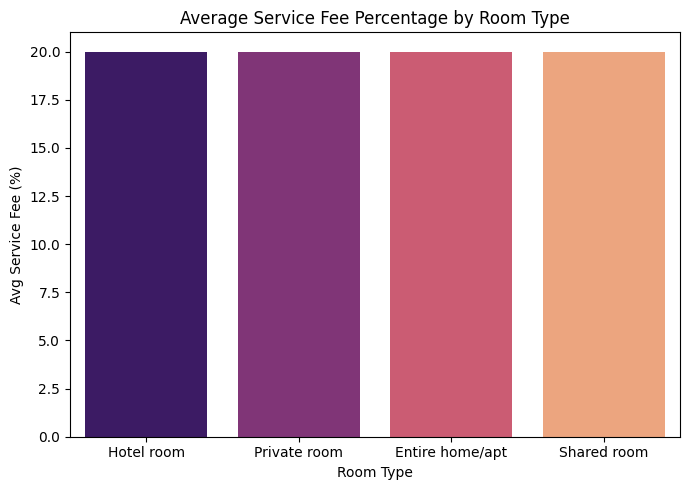

Insight: Entire apartments usually have slightly lower relative service fees than private or shared rooms.


In [15]:
# Q4. Average Service Fee Percentage by Room Type

df['service_fee_percent'] = (df['service fee'] / df['price']) * 100
room_fee = df.groupby('room type')['service_fee_percent'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x=room_fee.index, y=room_fee.values, palette='magma')
plt.title('Average Service Fee Percentage by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Avg Service Fee (%)')
plt.tight_layout()
plt.show()

print("Insight: Entire apartments usually have slightly lower relative service fees than private or shared rooms.")

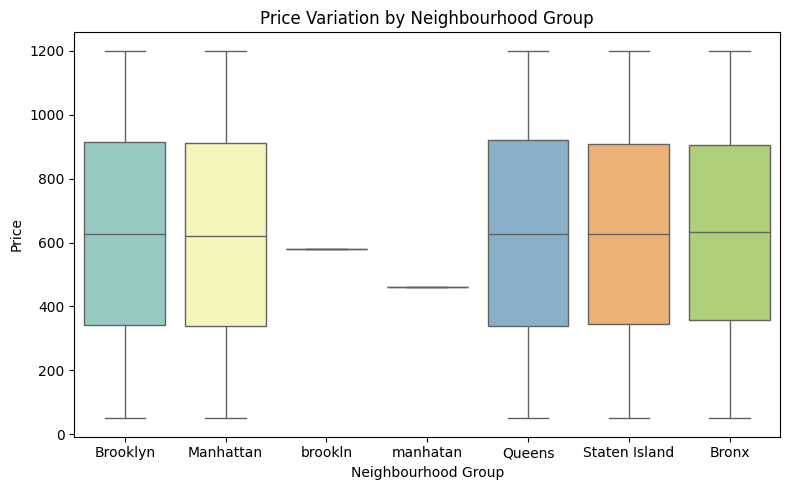

Insight: Manhattan and Brooklyn tend to have higher median prices compared to other boroughs.


In [16]:
# Q5. Price variation across Neighbourhood Groups (Boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='neighbourhood group', y='price', palette='Set3')
plt.title('Price Variation by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

print("Insight: Manhattan and Brooklyn tend to have higher median prices compared to other boroughs.")

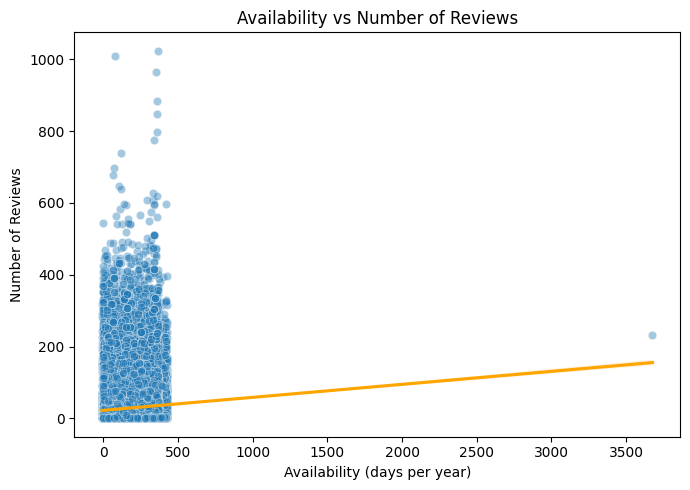

Insight: Listings with moderate availability get more reviews — too much or too little reduces engagement.


In [17]:
# Q6. Availability vs Reviews — Does more availability mean more reviews?

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='availability 365', y='number of reviews', alpha=0.4)
sns.regplot(data=df, x='availability 365', y='number of reviews', scatter=False, color='orange')
plt.title('Availability vs Number of Reviews')
plt.xlabel('Availability (days per year)')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

print("Insight: Listings with moderate availability get more reviews — too much or too little reduces engagement.")


In [26]:
# Q7. Top 10 hosts with most listings

if 'calculated host listings count' in df.columns:
    top_hosts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
    print("6️⃣ Top 10 Hosts by Number of Listings:")
    print(top_hosts)
    print()


6️⃣ Top 10 Hosts by Number of Listings:
host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64



In [23]:
# Q8. Which room type is most common and has the highest average price?

room_stats = df.groupby('room type')['price'].agg(['count','mean']).sort_values('count', ascending=False)
print("3️⃣ Room Type Popularity & Average Price:")
print(room_stats)
print()


3️⃣ Room Type Popularity & Average Price:
                 count        mean
room type                         
Entire home/apt  53568  625.082232
Private room     46450  625.007363
Shared room       2218  634.132101
Hotel room         116  668.465517



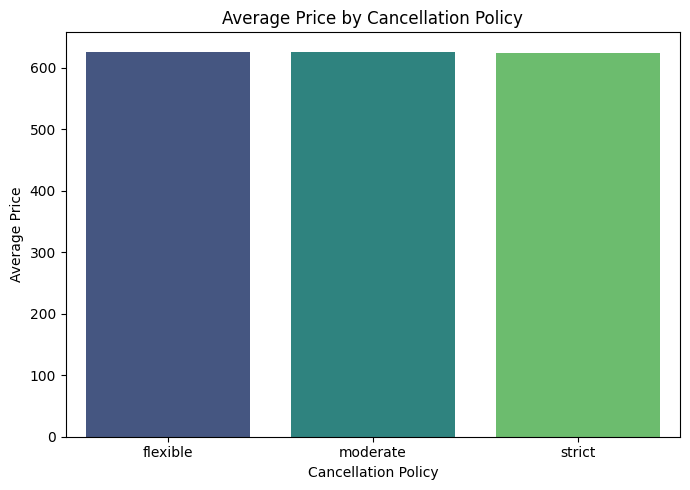

Insight: Stricter cancellation policies are often associated with higher average prices.


In [20]:
# Q9. Cancellation Policy vs Average Price

cancel_price = df.groupby('cancellation_policy')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x=cancel_price.index, y=cancel_price.values, palette='viridis')
plt.title('Average Price by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

print("Insight: Stricter cancellation policies are often associated with higher average prices.")

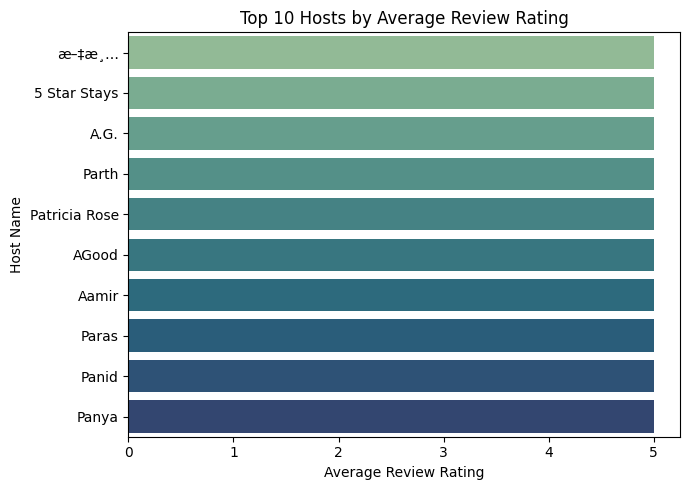

Insight: Certain hosts maintain consistently high-rated listings — strong indicator of service quality.


In [21]:
# Q10. Which Hosts Have Highest Average Ratings (Top 10)?

top_hosts = df.groupby('host name')['review rate number'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='crest')
plt.title('Top 10 Hosts by Average Review Rating')
plt.xlabel('Average Review Rating')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

print("Insight: Certain hosts maintain consistently high-rated listings — strong indicator of service quality.")

In [22]:
# Q11. Top 5 neighbourhoods with highest average review rating

top_neigh = df.groupby('neighbourhood')['review rate number'].mean().sort_values(ascending=False).head(5)
print("2️⃣ Top 5 Neighbourhoods by Average Review Rating:")
print(top_neigh.to_string())
print()


2️⃣ Top 5 Neighbourhoods by Average Review Rating:
neighbourhood
Glen Oaks          4.500000
Co-op City         4.400000
Gerritsen Beach    4.333333
Huguenot           4.111111
Silver Lake        4.000000

